#  Importing necessary libraries

In [2]:
import numpy as np # scientific computation
import pandas as pd # loading dataset file
import matplotlib.pyplot as plt # Visulization
import nltk  # Preprocessing our text
from nltk.corpus import stopwords # removing all the stop words
from nltk.stem.porter import PorterStemmer # stemming of words

# Load our dataset


In [3]:
#Load our dataset
df = pd.read_csv("spam_ham_dataset.csv")

# EDA on Dataset

In [4]:
# Return the shape of data 
df.shape

(5171, 4)

In [5]:
# Return the n dimensions of data
df.ndim

2

In [6]:
# Return the size of data 
df.size

20684

In [7]:
#Returns the sum fo all na values
df.isna().sum() 

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
#Give concise summary of a DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
# top 5 rows of the dataframe
df.head() 

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
# bottom 5 rows of the dataframe
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


# Let’s Visualize the Column label_num

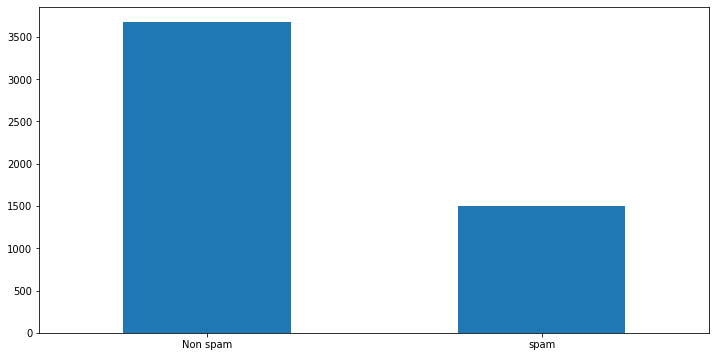

In [11]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

# Cleaning The Text

In [12]:
import re
corpus = []
length = len(df)


In [13]:
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)


In [14]:
corpus

['subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb 25 januari 1 like think minut calend hand begin fall semest retreat schedul weekend januari 5 6 youth minist confer brad dustin connect week go chang date follow weekend januari 12 13 come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place 13 bedroom 5 bedroom hous

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [16]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values


# Dumping the CV for future use

In [17]:
import pickle ## importing pickle used for dumping models
pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

# Modeling and Training

In [18]:
#Splitting data into train and validation sets using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##train size 80% and test size 20%

# Creating a model using Multinomial NaiveBayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [20]:
#Fitting the model to the training sets
model.fit(X_train, y_train)

MultinomialNB()

# Prediction


In [21]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

# Evaluating Model

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is:- ' ,score*100)

[[716  16]
 [ 17 286]]
Accuracy Score Is:-  96.81159420289856


# Saving our model

In [23]:
import pickle
pickle.dump(model, open("spam.pkl", "wb"))

# Test our save model by loading it and testing on test data.

In [24]:
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9681159420289855

# Prediction for a new email

In [46]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
  print("SPAM")
else :
  print("NOT SPAM")

Enter new review...IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
SPAM


In [25]:
from sklearn.svm import SVC
svm1=SVC(kernel='rbf')
svm1.fit(X_train,y_train) 

SVC()

In [26]:
y_pred4=svm1.predict(X_test)
from sklearn.metrics import accuracy_score
svm_rbf=accuracy_score(y_test,y_pred4)
svm_rbf

0.9623188405797102

In [28]:
svm2=SVC(kernel='sigmoid')
svm2.fit(X_train,y_train) 

SVC(kernel='sigmoid')

In [30]:
y_pred5=svm2.predict(X_test)
from sklearn.metrics import accuracy_score
svm_sig=accuracy_score(y_test,y_pred5)
svm_sig

0.9652173913043478

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred6=dt.predict(X_test)
from sklearn.metrics import accuracy_score
dec_tree=accuracy_score(y_test,y_pred6)
dec_tree

0.9468599033816425

In [34]:
models = pd.DataFrame({
    'Model': [ 'MultinomialNB','SVM-rbf','SVM-sigmoid','Decision Tree'],
    'Test Score': [ score,svm_rbf,svm_sig,dec_tree,]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,MultinomialNB,0.968116
2,SVM-sigmoid,0.965217
1,SVM-rbf,0.962319
3,Decision Tree,0.946860
